In [1]:
import aifc
import numpy
import matplotlib.pyplot as plt

file = 'data/train/'
audio_file = 'train{}.aiff'.format(32)

file_number = 5
if file_number <= 5:
    file = file.format('no_')
else:
    file = file.format('') 

f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
nfft = 256  # Length of the windowing segments
fs = 2000
noverlap = 128
plt.title('Overlap = %d' % noverlap)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=noverlap)
plt.axis('off')
plt.subplot(1,2,2)
nfft = 256
fs = 2000
noverlap = 64
plt.title('Overlap = %d' % noverlap)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=noverlap)
plt.axis('off')

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
nfft = 256  # Length of the windowing segments
fs = 2
plt.title('Window %d' % nfft)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')
plt.subplot(1,2,2)
nfft = 128
fs = 2
plt.title('Window %d' % nfft)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=nfft/2)
plt.axis('off')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(16.0, 1968.0, 0.0, 1.0)

In [2]:
def get_spec(plt , save_name):
    nfft = 256  # Length of the windowing segments
    fs = 2
    pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, noverlap=128)
    plt.axis('off')
    plt.savefig(save_name,
                dpi=100,  # Dots per inch
                frameon='false',
                aspect='normal',
                bbox_inches='tight',
                pad_inches=0)  # Spectrogram saved as a .png


In [3]:
f.getnchannels(), f.getsampwidth(), f.getframerate(), f.getnframes(), f.getcomptype(), f.getmarkers()

(1, 2, 2000, 4000, b'NONE', None)

In [4]:
f.getparams()

_aifc_params(nchannels=1, sampwidth=2, framerate=2000, nframes=4000, comptype=b'NONE', compname=b'not compressed')

(128, 87)


(0.0, 11025.0)

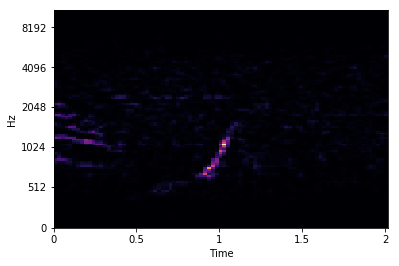

In [5]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=196)
ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
# ps = librosa.core.stft(y=y)
print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.ylim()

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\librosa\display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


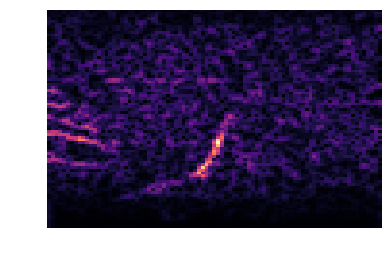

In [6]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=2)
# ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
ps = librosa.core.stft(y=y)
# print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.axis('off')
a = plt.ylim(ymax = 256)

In [58]:
data

array([ 179, -429, -434, ..., -172, -145, -137], dtype=int16)

In [7]:
plt.show(librosa.feature.melspectrogram(y=y))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

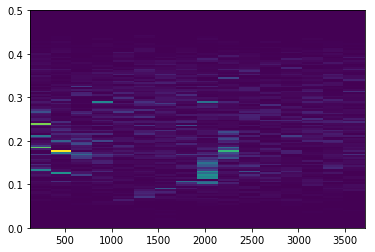

In [48]:
import scipy.signal as signal

f, t, sxx = signal.spectrogram(data)
aaa = plt.pcolormesh(t, f, sxx)

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


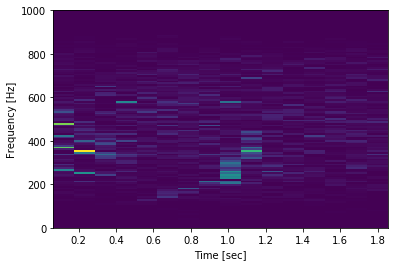

In [49]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

# sample_rate, audio = wavfile.read(path_to_wav_file)

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)
f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()
sample_freq, segment_time, spec_data = log_specgram(data, f.getframerate())
sample_freq, segment_time, spec_data = signal.spectrogram(data, f.getframerate())  
plt.pcolormesh(segment_time, sample_freq, spec_data )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

https://www.kaggle.com/timolee/audio-data-conversion-to-images-eda

In [15]:
sample_freq, segment_time, spectrogram = log_specgram(data, f.getframerate())
plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')

NameError: name 'log_specgram' is not defined

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


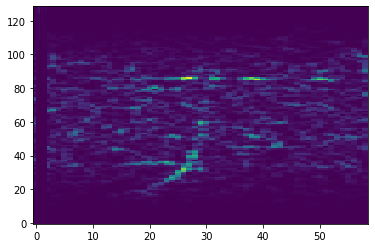

In [20]:
from matplotlib import mlab
import numpy as np

s = aifc.open(file+audio_file,'r')
nFrames = s.getnframes()
strSig = s.readframes(nFrames)
s = np.fromstring(strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(s, **params)
plt.pcolormesh(bins, freqs, P)
plt.imshow(P, aspect='auto', origin='lower')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/librosa/display.py:709: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


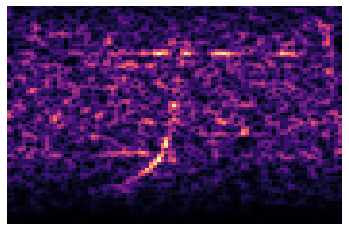

In [24]:
import librosa
import librosa.display

params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(data, **params)

y, sr = librosa.load(file + audio_file, duration=2)
# ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
ps = librosa.core.stft(y=y)
# print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.axis('off')
a = plt.ylim(ymax = 256)

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


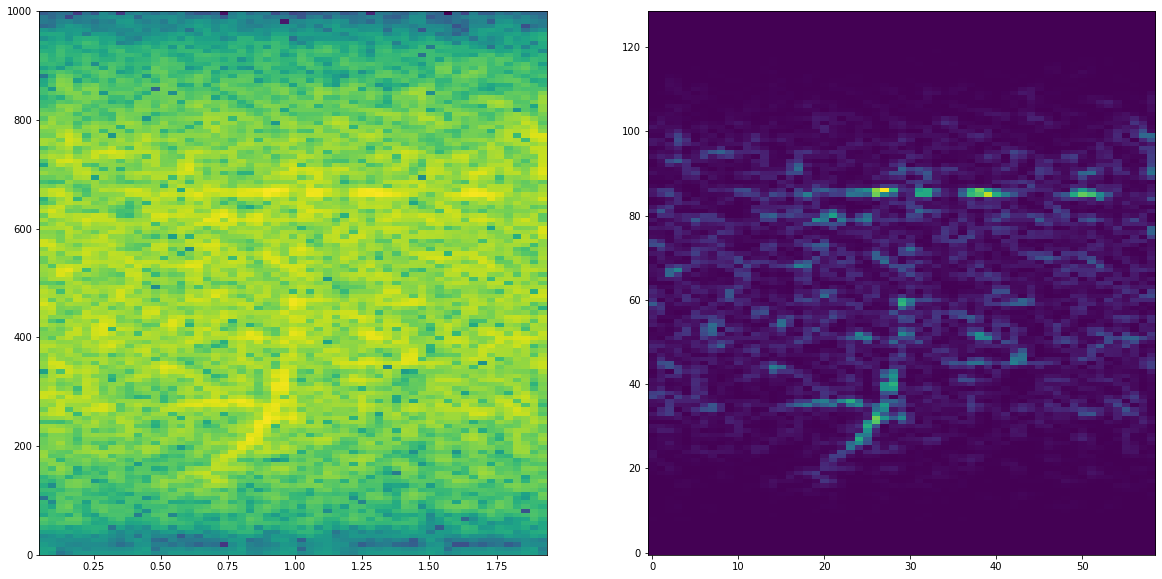

In [2]:
from matplotlib import mlab
import numpy as np

plt.figure(figsize=(20,10))
s = aifc.open(file+audio_file,'r')
nFrames = s.getnframes()
strSig = s.readframes(nFrames)
s = np.fromstring(strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
plt.subplot(1,2,1)
pxx, freqs, bins, im = plt.specgram(data, **params)
plt.subplot(1,2,2)
plt.imshow(pxx, aspect='auto', origin='lower')

In [ ]:
plt.subplot(1,2,1)
pxx, freqs, bins, im = plt.specgram(data, **params)
plt.subplot(1,2,2)
plt.imshow(pxx, aspect='auto', origin='lower')

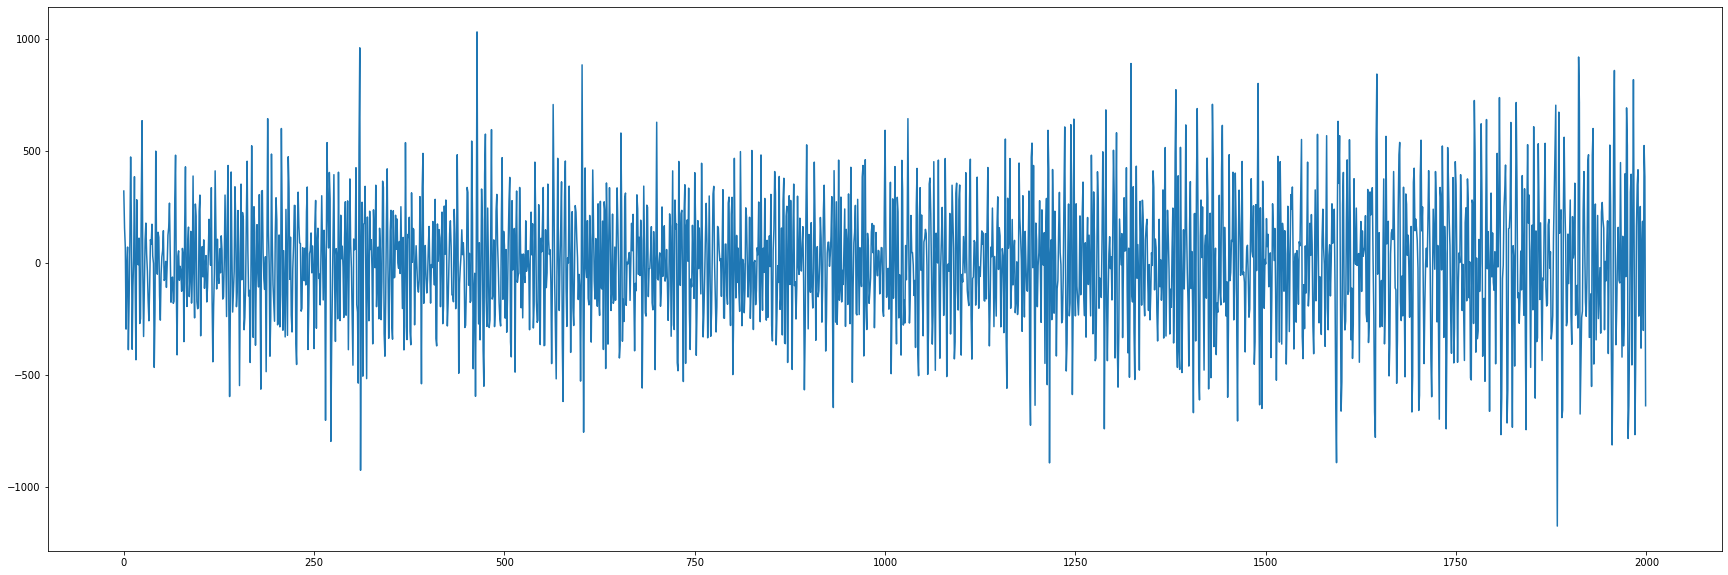

In [14]:
plt.figure(figsize=(30, 10))
plt.plot(data[:2000])

(0.032, 1.952, 0.0, 1000.0)

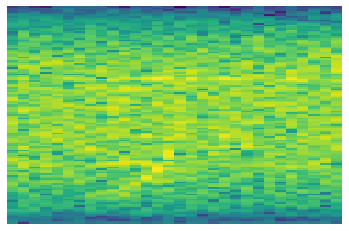

In [18]:
nfft = 256  # Length of the windowing segments
fs = 2000
noverlap = 128
# plt.figure(figsize=(20, 10))
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')


# Best Proves

In [4]:
# python basic pacakages
import aifc
import os
import datetime
import sys
from os import listdir
from os.path import isfile, join
import csv

# required packags
import librosa
import numpy as np
import pandas as pd

from matplotlib import mlab
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# my packages
from DataManager.Audio import *
from DataManager.General import *



## Kaggle Data Original

In [5]:
labels_path = "data/train.csv"
train_path = "data/train"

audiofiles = [os.path.join(train_path, f) for f in listdir(train_path) if isfile(join(train_path, f))]
labels_dict = get_labels(labels_path)

In [6]:
n = 5
s = aifc.open(audiofiles[n], 'r')
framerate = s.getframerate()
nframes = s.getnframes()
strsig = s.readframes(nframes)
data = np.fromstring(strsig, np.short).byteswap()
labels_dict[audiofiles[n].split('/')[-1]], data[:30]

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


('0', array([  4,  -2,  -2,  -1, -10,  -5,  -6,  -5,   0,  -7,   0,  15,  -7,
          0,  10, -13, -14,   8,   7,   1,  12, -19, -19,  22,  -4,  -7,
         36, -33, -36,  22], dtype=int16))

In [4]:
framerate, nframes

(2000, 4000)

In [5]:
np.linspace(0, framerate/nframes, nframes).shape

(4000,)

In [6]:
audiofiles[:5]

['data/train/train20442.aiff',
 'data/train/train22387.aiff',
 'data/train/train11653.aiff',
 'data/train/train3672.aiff',
 'data/train/train27628.aiff']

/scripts/WhaleClassification/tfenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


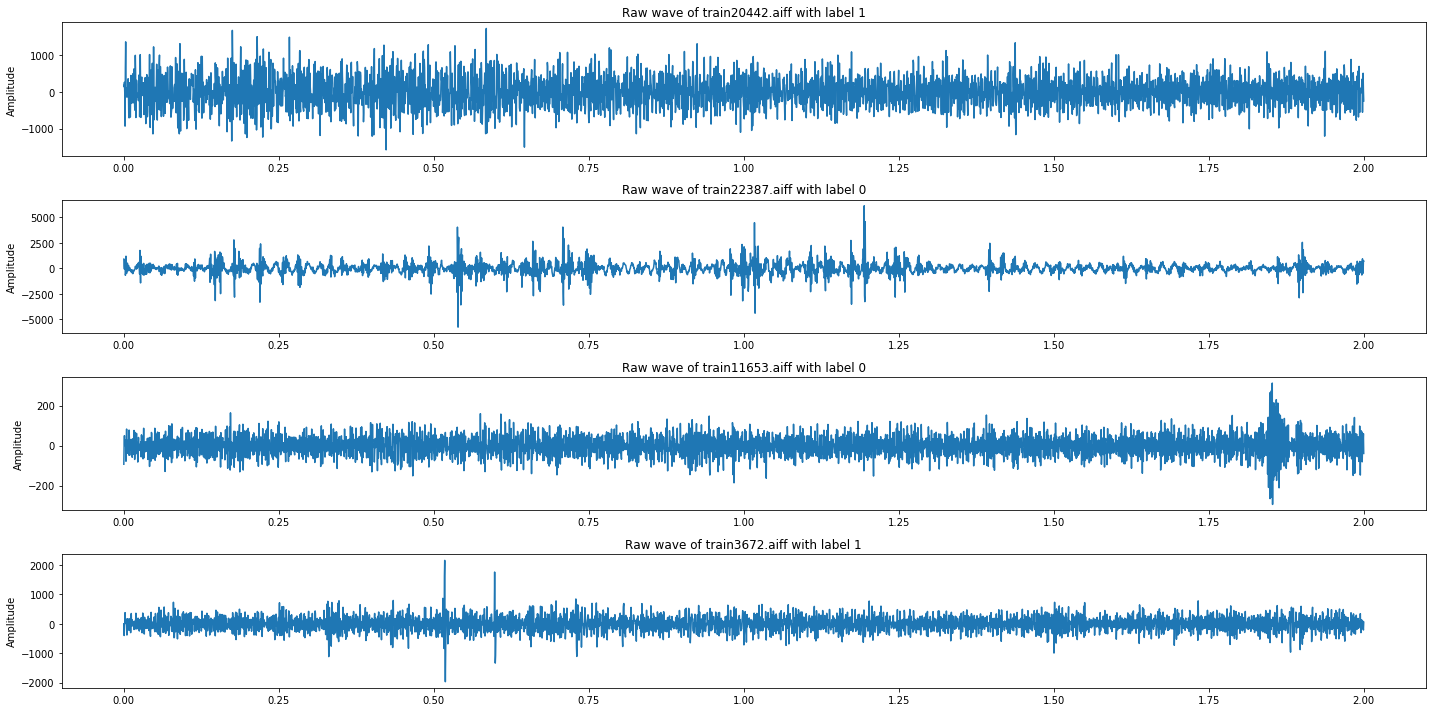

In [7]:
fig = plt.figure(figsize=(20, 10))

n=4

for i, fn in enumerate(audiofiles[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % labels_dict[fn.split('/')[-1]])
    ax.set_ylabel('Amplitude')
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
fig.tight_layout()
plt.savefig('wave_example.png')

In [ ]:
'http://dkopczyk.quantee.co.uk/speech-nn/'

## Kaggle Data Redux

In [3]:
redux_train_path = "data/train2"

audiofiles_redux = [os.path.join(redux_train_path, f) 
                    for f in listdir(redux_train_path) if isfile(join(redux_train_path, f))]

np.array([int(clip_name[-5]) for clip_name in audiofiles_redux]).sum()/len(audiofiles_redux)

NameError: name 'listdir' is not defined

In [5]:
audiofiles_redux

['data/train2/20090329_050000_18287s1ms_TRAIN11836_0.aif',
 'data/train2/20090328_113000_41463s8ms_TRAIN3809_0.aif',
 'data/train2/20090331_043000_16473s2ms_TRAIN36892_0.aif',
 'data/train2/20090331_141500_51538s1ms_TRAIN41644_1.aif',
 'data/train2/20090330_053000_19978s0ms_TRAIN24919_1.aif',
 'data/train2/20090331_094500_35548s8ms_TRAIN39706_0.aif',
 'data/train2/20090331_174500_64555s7ms_TRAIN43589_0.aif',
 'data/train2/20090329_124500_46591s3ms_TRAIN15081_1.aif',
 'data/train2/20090328_211500_76528s5ms_TRAIN6561_0.aif',
 'data/train2/20090329_201500_73725s2ms_TRAIN21046_0.aif',
 'data/train2/20090331_030000_11195s4ms_TRAIN36271_1.aif',
 'data/train2/20090329_211500_76599s6ms_TRAIN21470_1.aif',
 'data/train2/20090328_140000_50931s0ms_TRAIN4231_0.aif',
 'data/train2/20090330_080000_29018s4ms_TRAIN25803_0.aif',
 'data/train2/20090330_081500_29892s1ms_TRAIN25876_0.aif',
 'data/train2/20090329_141500_51465s8ms_TRAIN15746_0.aif',
 'data/train2/20090328_160000_58240s0ms_TRAIN4709_0.aif',
 

In [32]:
n = 2
s = aifc.open(audiofiles_redux[n], 'r')
framerate = s.getframerate()
nframes = s.getnframes()
strsig = s.readframes(nframes)
data = np.fromstring(strsig, np.short).byteswap()
audiofiles_redux[n][-5], data[:30]

/scripts/WhaleClassification/tfenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


('0', array([-1664, -1600, -1712, -1696, -1632, -1584, -1680, -1680, -1600,
        -1568, -1536, -1568, -1536, -1552, -1616, -1552, -1632, -1536,
        -1600, -1648, -1632, -1664, -1536, -1568, -1488, -1424, -1408,
        -1456, -1632, -1552], dtype=int16))

In [33]:
framerate, nframes

(2000, 4000)

In [10]:
np.linspace(0, framerate/nframes, nframes).shape

(4000,)

In [12]:
audiofiles_redux[:5]

['data/train2/20090329_050000_18287s1ms_TRAIN11836_0.aif',
 'data/train2/20090328_113000_41463s8ms_TRAIN3809_0.aif',
 'data/train2/20090331_043000_16473s2ms_TRAIN36892_0.aif',
 'data/train2/20090331_141500_51538s1ms_TRAIN41644_1.aif',
 'data/train2/20090330_053000_19978s0ms_TRAIN24919_1.aif']

/scripts/WhaleClassification/tfenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


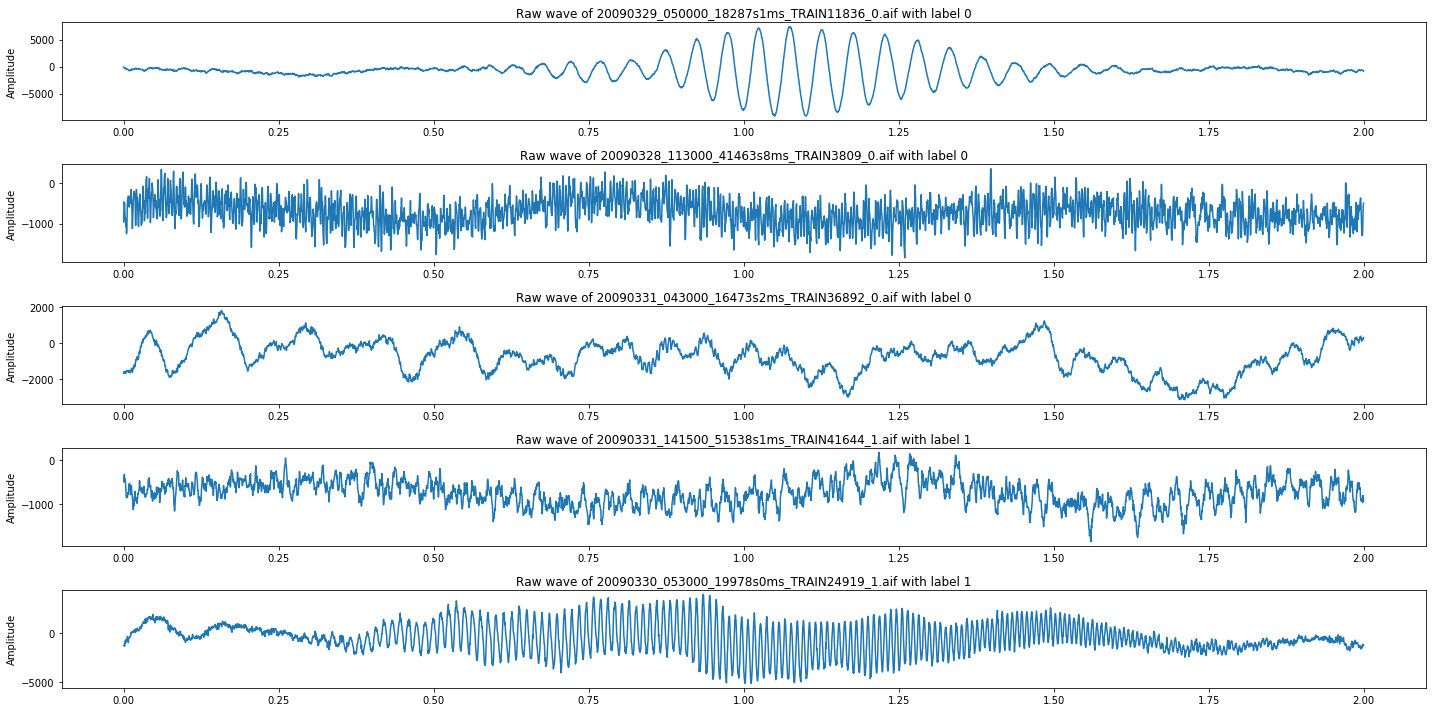

In [36]:
fig = plt.figure(figsize=(20, 10))

n=5

for i, fn in enumerate(audiofiles_redux[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    s.close()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % fn[-5])
    ax.set_ylabel('Amplitude')
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
fig.tight_layout()
plt.savefig('wave_example_redux.png')

/scripts/WhaleClassification/tfenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


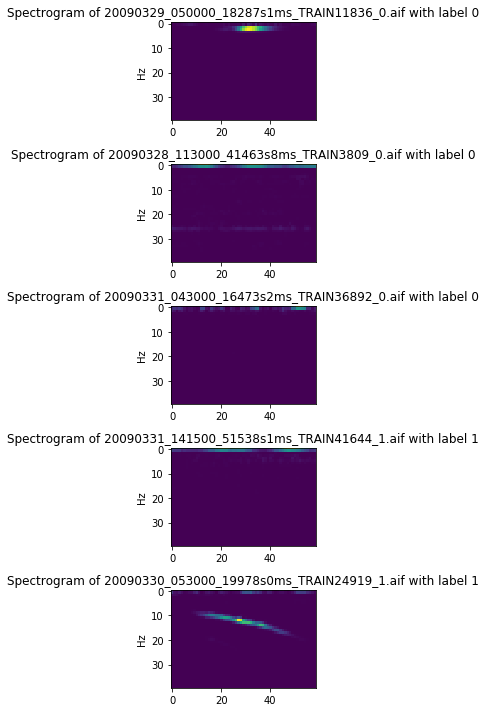

In [41]:
top_hz = 40

fig = plt.figure(figsize=(20, 10))

n=5

for i, fn in enumerate(audiofiles_redux[:n]):
    with aifc.open(fn, 'r') as s:
        framerate = s.getframerate()
        nframes = s.getnframes()
        strsig = s.readframes(nframes)
        data = np.fromstring(strsig, np.short).byteswap()
    # check if it comes from redux data it is not in the labels dictionary
    params = {'NFFT': 256, 'Fs': framerate, 'noverlap': 192}
    P, freqs, bins = mlab.specgram(data, **params)
    P = P[:top_hz]
    
    P = (P - P.min()) / (P.max() - P.min())
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Spectrogram of ' + fn.split('/')[-1] + ' with label %s' % fn[-5])
    ax.set_ylabel('Hz')
    ax.imshow(P)
        
fig.tight_layout()
plt.savefig('spect_example_redux.png')

In [59]:
s = read_aiff(audiofiles[4])
# check if it comes from redux data it is not in the labels dictionary
params = {'NFFT': 256, 'Fs': 2000, 'noverlap': 192}
P, freqs, bins = mlab.specgram(s, **params)
P

array([[9.63432590e-02, 9.19158751e-02, 1.11144069e-01, ...,
        9.99093395e-02, 1.06800729e-01, 1.17323029e-01],
       [8.17639593e-02, 1.13514463e-01, 3.80404143e-02, ...,
        4.19526563e-02, 6.54599375e-02, 7.58338569e-02],
       [2.23919200e-01, 4.19218800e-01, 4.49634729e-01, ...,
        5.83213686e-03, 1.92916115e-02, 5.31903262e-02],
       ...,
       [4.70524895e-03, 9.01344224e-03, 4.74337416e-03, ...,
        3.32690498e-03, 8.12677367e-03, 2.34441266e-02],
       [4.29100858e-03, 3.03903306e-03, 3.14513910e-03, ...,
        1.12518002e-03, 1.20456761e-03, 4.69885056e-04],
       [4.34018768e-03, 4.06217413e-03, 3.12478242e-03, ...,
        8.41148373e-04, 6.74848855e-04, 3.83296580e-04]])

# Spectrogram Histograms for normalization

In [7]:
def f(x):
    return x / x.max()

def log_norm(x):
    log_spect = np.log(x + 1)
    return log_spect / log_spect.max()

def f_05(x):
    x_min = x.min()
    return (x - x_min) / (x.max() - x_min) - .5


def f_norm(x):
    x_min = x.min()
    return (x - x.mean()) / x.std()
    

In [8]:
p = 0.85
s = read_aiff(audiofiles[12])
s = s[int(s.shape[0] * (1 - p) / 2): int(s.shape[0] * (1 + p) / 2)]
params = {'NFFT': 256, 'Fs': 2000, 'noverlap': 192}
P, freqs, bins = mlab.specgram(s, **params)

[]

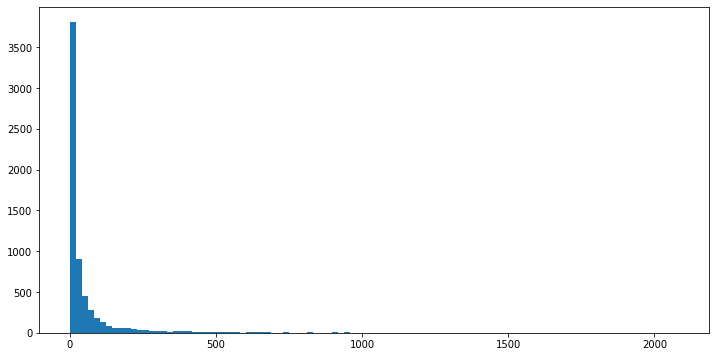

In [9]:
plt.figure(figsize=(12,6))
q = plt.hist(P.flatten(), bins=100)
plt.plot()
# plt.xticks(xp_list)

[]

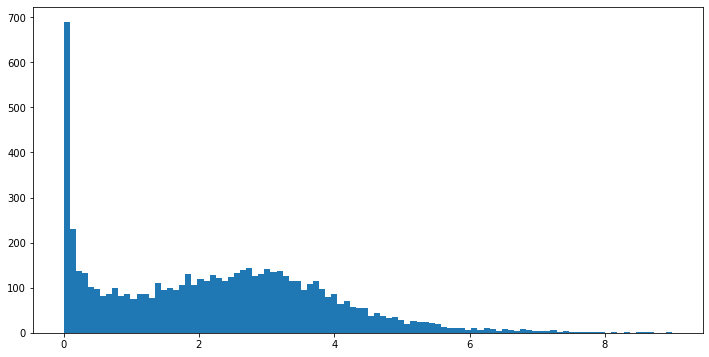

In [15]:
plt.figure(figsize=(12,6))
q = plt.hist(np.log(P.flatten() + 1), bins=100)
plt.plot()

[]

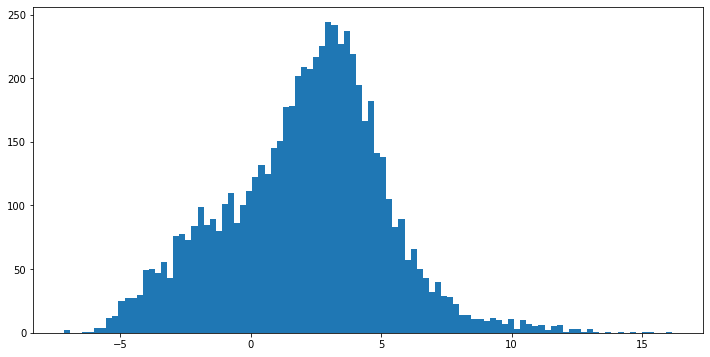

In [16]:
from scipy import stats

xt, _ = stats.boxcox(P.flatten())

plt.figure(figsize=(12,6))
q = plt.hist(xt, bins=100)
plt.plot()

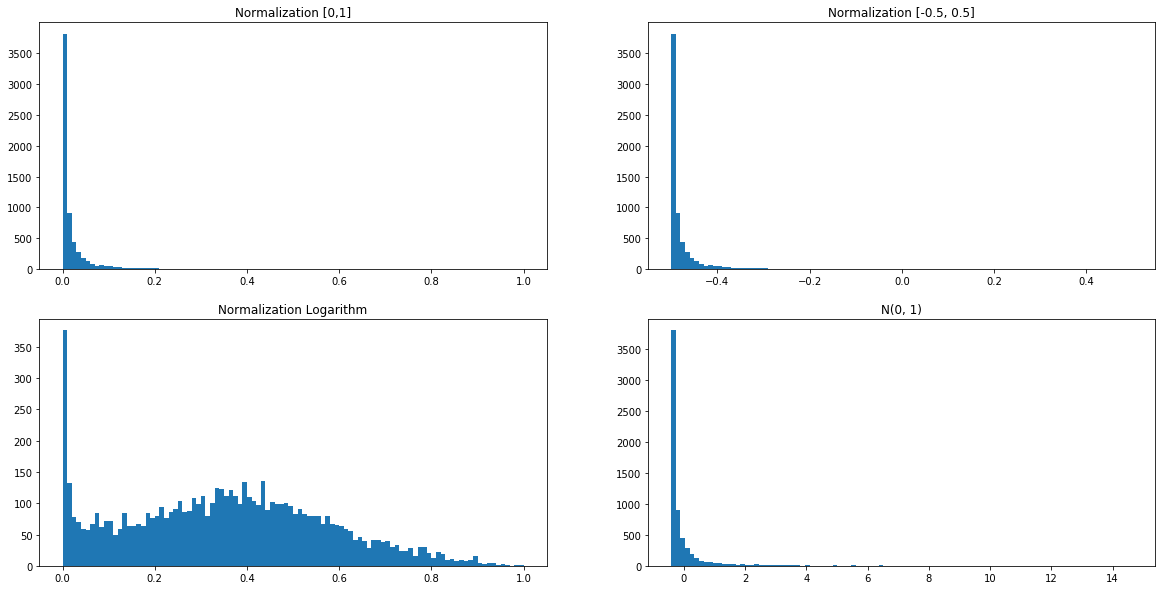

In [10]:
# p = 0.85
s = read_aiff(audiofiles[12])
s = s[int(s.shape[0] * (1 - p) / 2): int(s.shape[0] * (1 + p) / 2)]
params = {'NFFT': 256, 'Fs': 2000, 'noverlap': 192}
P, freqs, bins = mlab.specgram(s, **params)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].set_title('Normalization [0,1]')
ax[0, 0].hist(f(P.flatten()), bins=100)

ax[1, 0].set_title('Normalization Logarithm')
ax[1, 0].hist(log_norm(P.flatten()), bins=100)

ax[0, 1].set_title('Normalization [-0.5, 0.5]')
ax[0, 1].hist(f_05(P.flatten()), bins=100)

ax[1, 1].set_title('N(0, 1)')
ax[1, 1].hist(f_norm(P.flatten()), bins=100)
plt.show()

In [40]:
labels_dict[audiofiles[156].split('/')[-1]]

'1'

In [51]:
P[:59,:].shape

(59, 59)

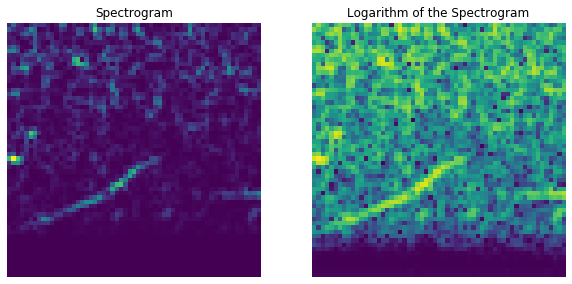

In [61]:
s = read_aiff(audiofiles[156])
# s = s[int(s.shape[0] * (1 - p) / 2): int(s.shape[0] * (1 + p) / 2)]
params = {'NFFT': 256, 'Fs': 2000, 'noverlap': 192}
P, freqs, bins = mlab.specgram(s, **params)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].set_title('Spectrogram')
ax[0].imshow(P[:59,:][::-1])
ax[0].axis('off')

ax[1].set_title('Logarithm of the Spectrogram')
ax[1].imshow(log_norm(P[:59,:][::-1]))
plt.axis('off')
plt.show()

In [79]:
xt, _ = stats.boxcox(P.ravel())

In [85]:
xt.reshape(P.shape)

array([[-1.85980599, -1.8888273 , -1.76991372, ..., -1.8371924 ,
        -1.79525242, -1.73519061],
       [-1.95982854, -1.75641576, -2.38443464, ..., -2.33374531,
        -2.09015578, -2.00461502],
       [-1.2892638 , -0.79650241, -0.7374409 , ..., -3.18298559,
        -2.70943519, -2.20655861],
       ...,
       [-3.25638661, -3.02389607, -3.25368557, ..., -3.36829852,
        -3.06303172, -2.62068936],
       [-3.28691755, -3.3962355 , -3.38570259, ..., -3.67124673,
        -3.65410846, -3.87088095],
       [-3.28317329, -3.30480276, -3.38770119, ..., -3.74175436,
        -3.79241896, -3.91254122]])

In [78]:
np.array([[1,2,3], [4,5,6], [7,8,9]]).flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [109]:
from sklearn.model_selection import StratifiedKFold

X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array(['1','0','1','0','1','0','1','0','1','0'])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
cvscores = []
for train, test in kfold.split(audiofiles, list(map(lambda x: labels_dict[x.split('/')[-1]], audiofiles))):
    print (np.array(audiofiles)[train].shape, np.array(audiofiles)[test].shape)
#     print (Y[train].shape, Y[test].shape)

(23999,) (6001,)
(23999,) (6001,)
(24000,) (6000,)
(24001,) (5999,)
(24001,) (5999,)


In [107]:
audiofiles

['data/train/train20442.aiff',
 'data/train/train22387.aiff',
 'data/train/train11653.aiff',
 'data/train/train3672.aiff',
 'data/train/train27628.aiff',
 'data/train/train22137.aiff',
 'data/train/train10480.aiff',
 'data/train/train713.aiff',
 'data/train/train17791.aiff',
 'data/train/train22673.aiff',
 'data/train/train19230.aiff',
 'data/train/train26336.aiff',
 'data/train/train18984.aiff',
 'data/train/train19367.aiff',
 'data/train/train26375.aiff',
 'data/train/train25937.aiff',
 'data/train/train7845.aiff',
 'data/train/train20255.aiff',
 'data/train/train21722.aiff',
 'data/train/train22649.aiff',
 'data/train/train20494.aiff',
 'data/train/train20381.aiff',
 'data/train/train28698.aiff',
 'data/train/train23557.aiff',
 'data/train/train17246.aiff',
 'data/train/train448.aiff',
 'data/train/train24400.aiff',
 'data/train/train27286.aiff',
 'data/train/train20548.aiff',
 'data/train/train24956.aiff',
 'data/train/train16248.aiff',
 'data/train/train13863.aiff',
 'data/train/t